# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.duplicated().any()
df.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
df=df.drop(["Marital_status","Relationship","Race","Sex"],axis=1)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Occupation,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Handlers-cleaners,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Handlers-cleaners,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Prof-specialty,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Exec-managerial,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Tech-support,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Machine-op-inspct,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Adm-clerical,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Adm-clerical,0,0,20,United-States,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Occupation      32560 non-null  object
 6   Capital_gain    32560 non-null  int64 
 7   Capital_loss    32560 non-null  int64 
 8   Hours_per_week  32560 non-null  int64 
 9   Native_country  32560 non-null  object
 10  Income          32560 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.7+ MB


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
Label = ["Workclass","Education","Occupation","Native_country","Income"]

for i in Label:
    df[i] = le.fit_transform(df[i])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Occupation,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,4,0,0,13,39,0
1,38,4,215646,11,9,6,0,0,40,39,0
2,53,4,234721,1,7,6,0,0,40,39,0
3,28,4,338409,9,13,10,0,0,40,5,0
4,37,4,284582,12,14,4,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,13,0,0,38,39,0
32556,40,4,154374,11,9,7,0,0,40,39,1
32557,58,4,151910,11,9,1,0,0,40,39,0
32558,22,4,201490,11,9,1,0,0,20,39,0


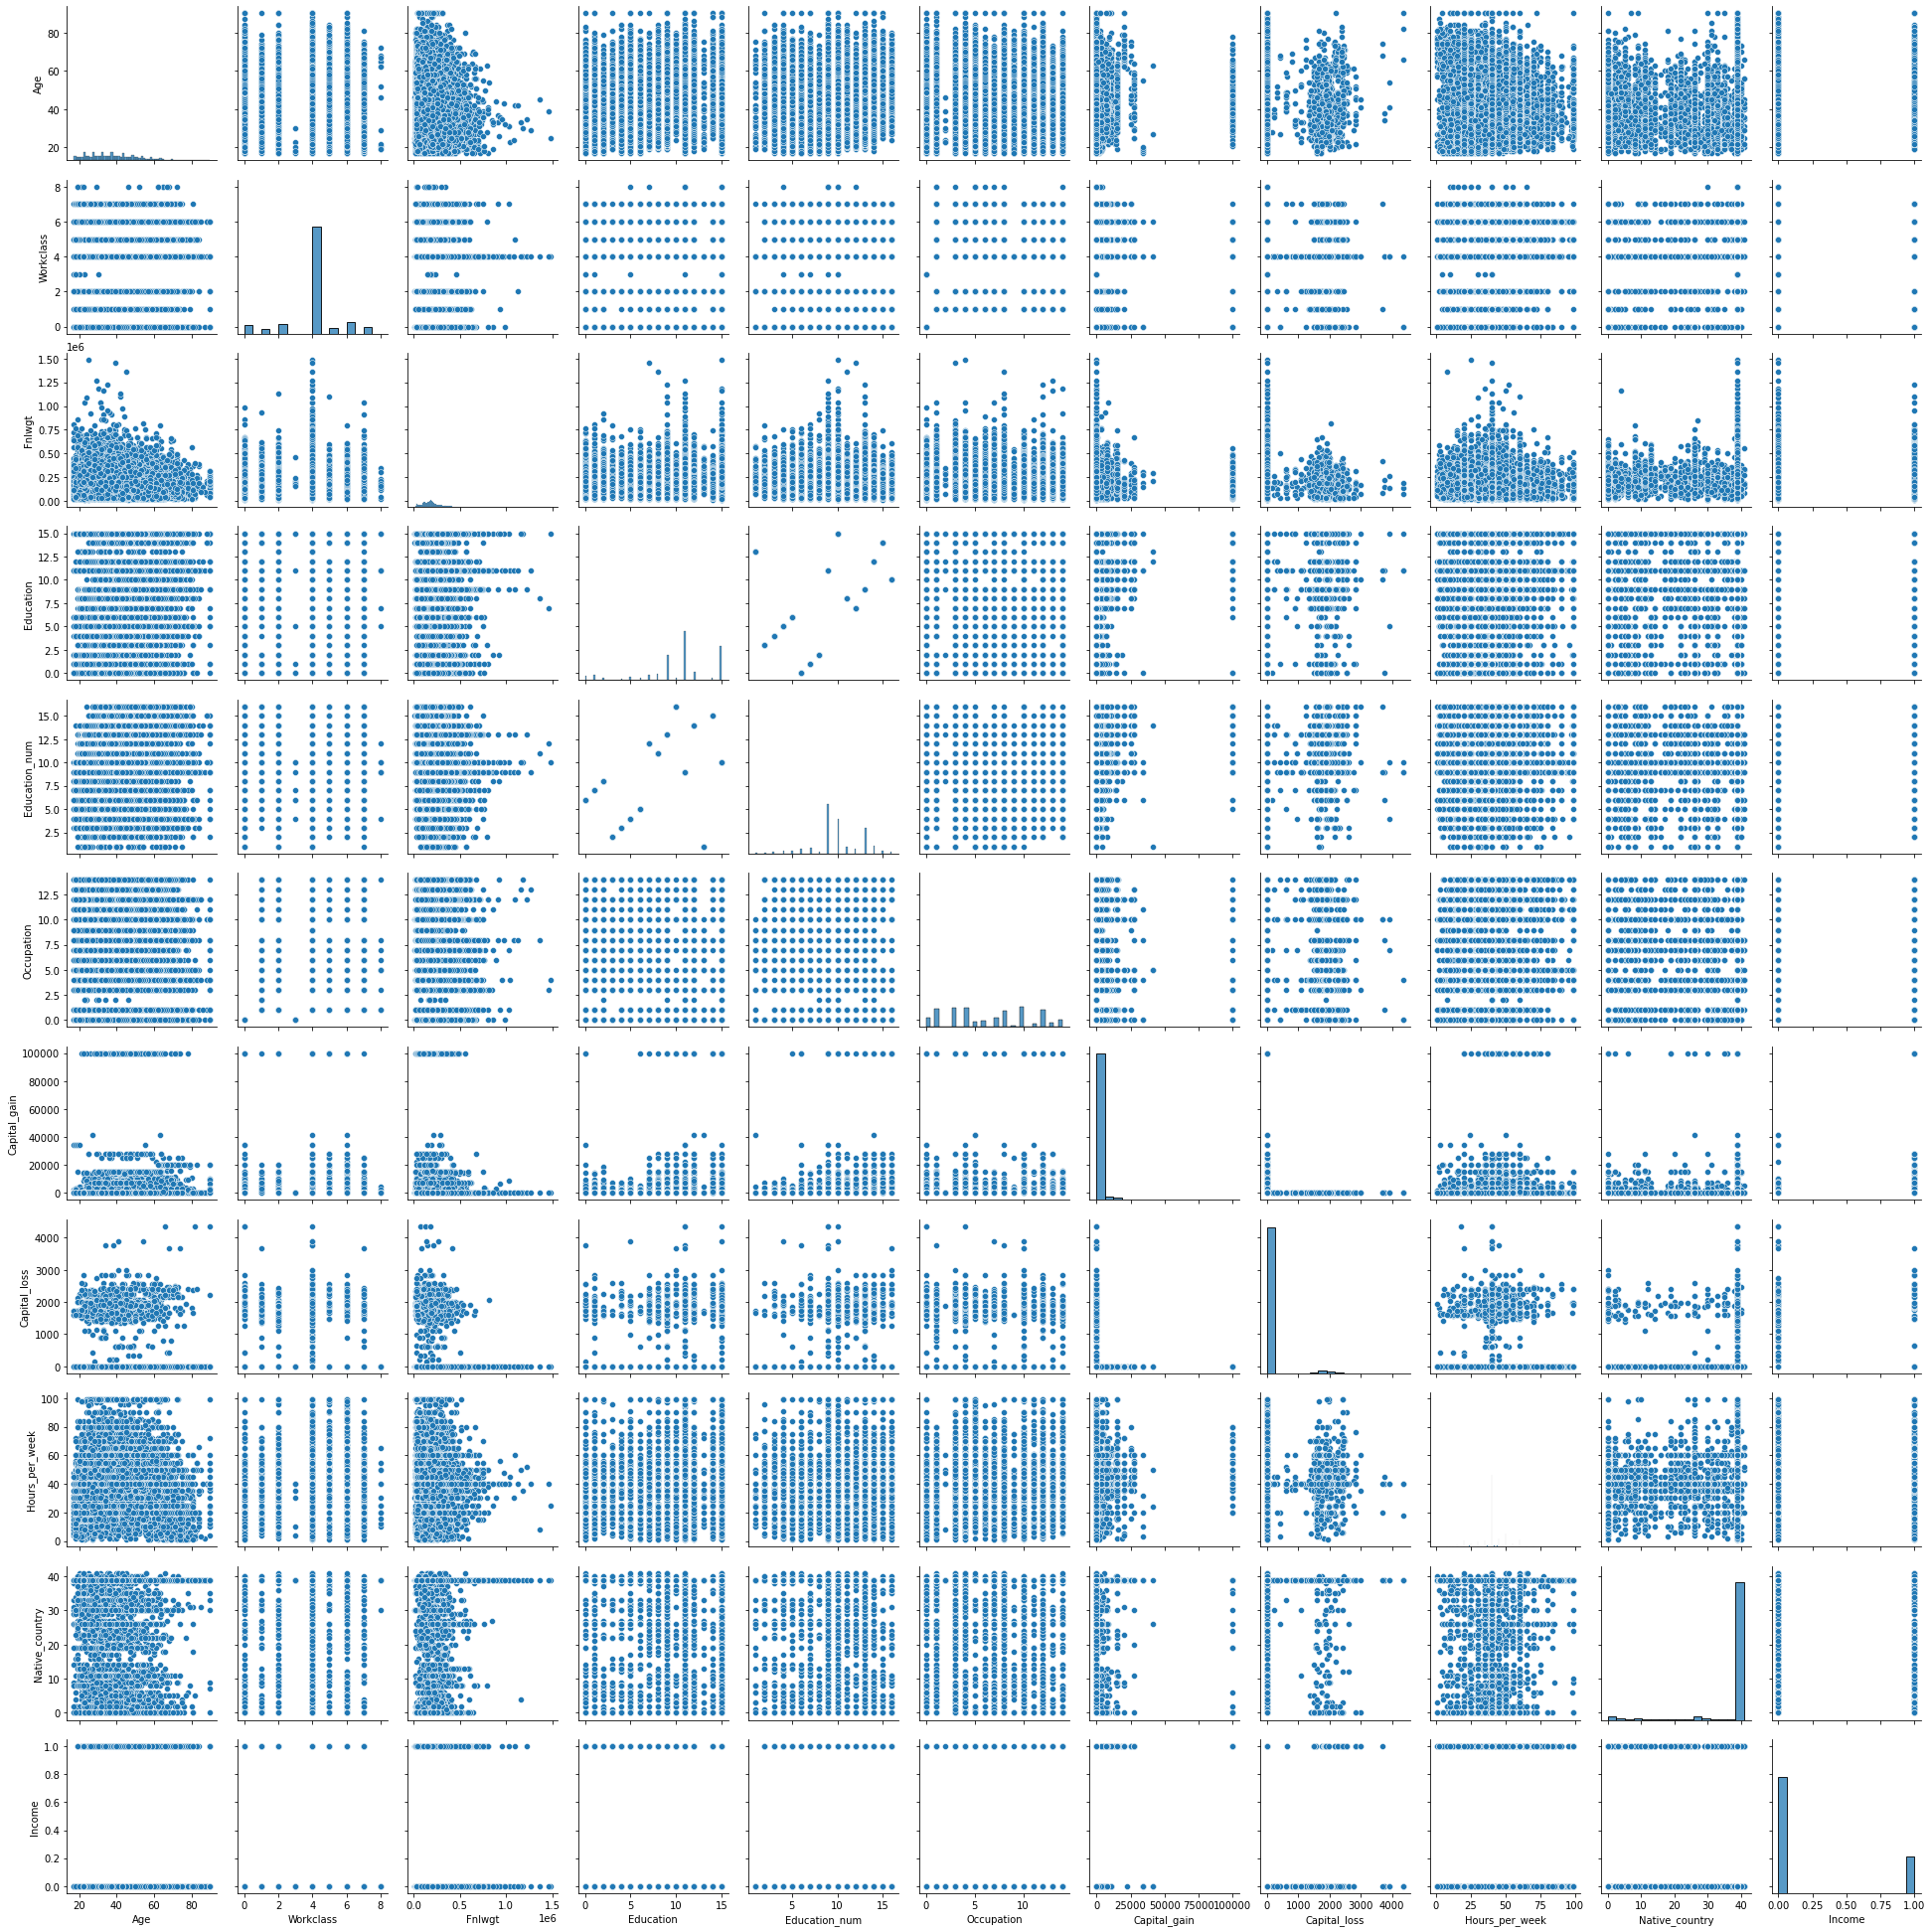

In [12]:
sns.pairplot(df)

Age                  AxesSubplot(0.125,0.749828;0.133621x0.130172)
Workclass         AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Fnlwgt             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Education         AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Education_num     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Occupation           AxesSubplot(0.125,0.593621;0.133621x0.130172)
Capital_gain      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Capital_loss       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Hours_per_week    AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Native_country    AxesSubplot(0.766379,0.593621;0.133621x0.130172)
dtype: object

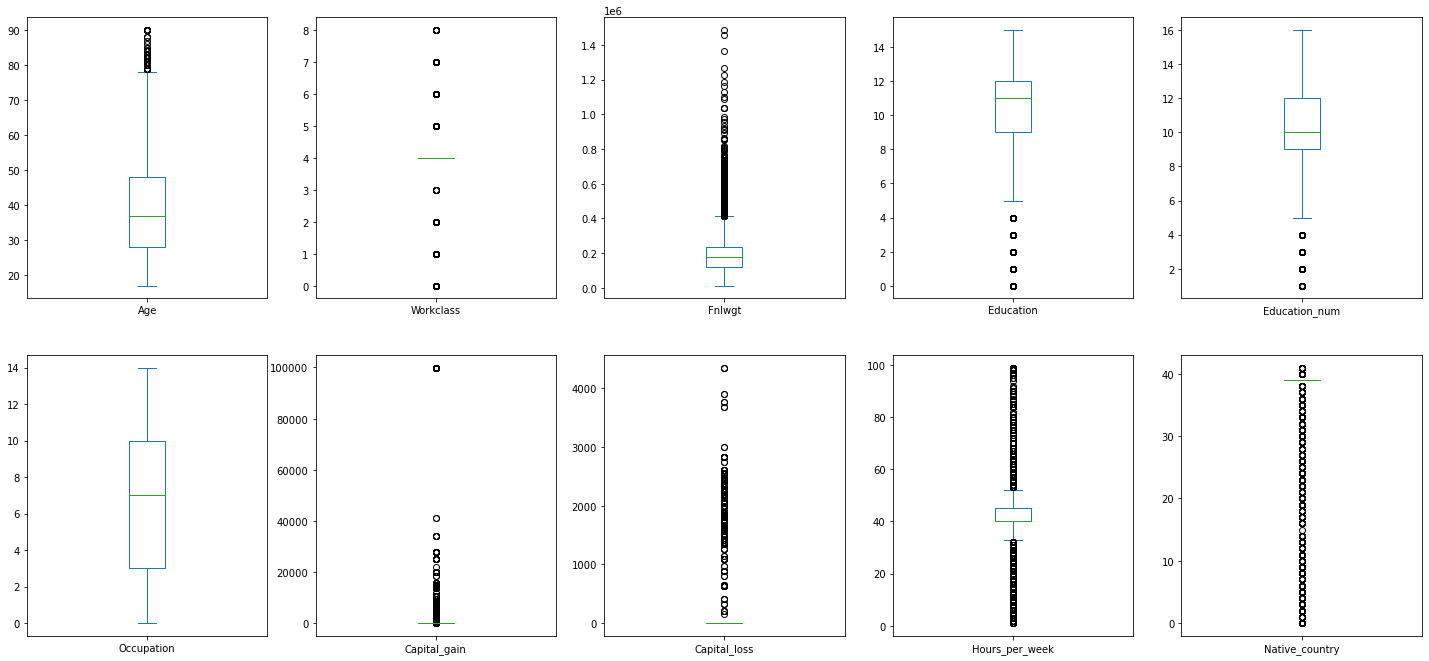

In [13]:
df.drop(["Income"],axis=1).plot(kind='box',subplots=True,layout=(5,5),figsize=(25,30))

In [14]:
X=df.drop(["Income"],axis=1)
Y=df.Income

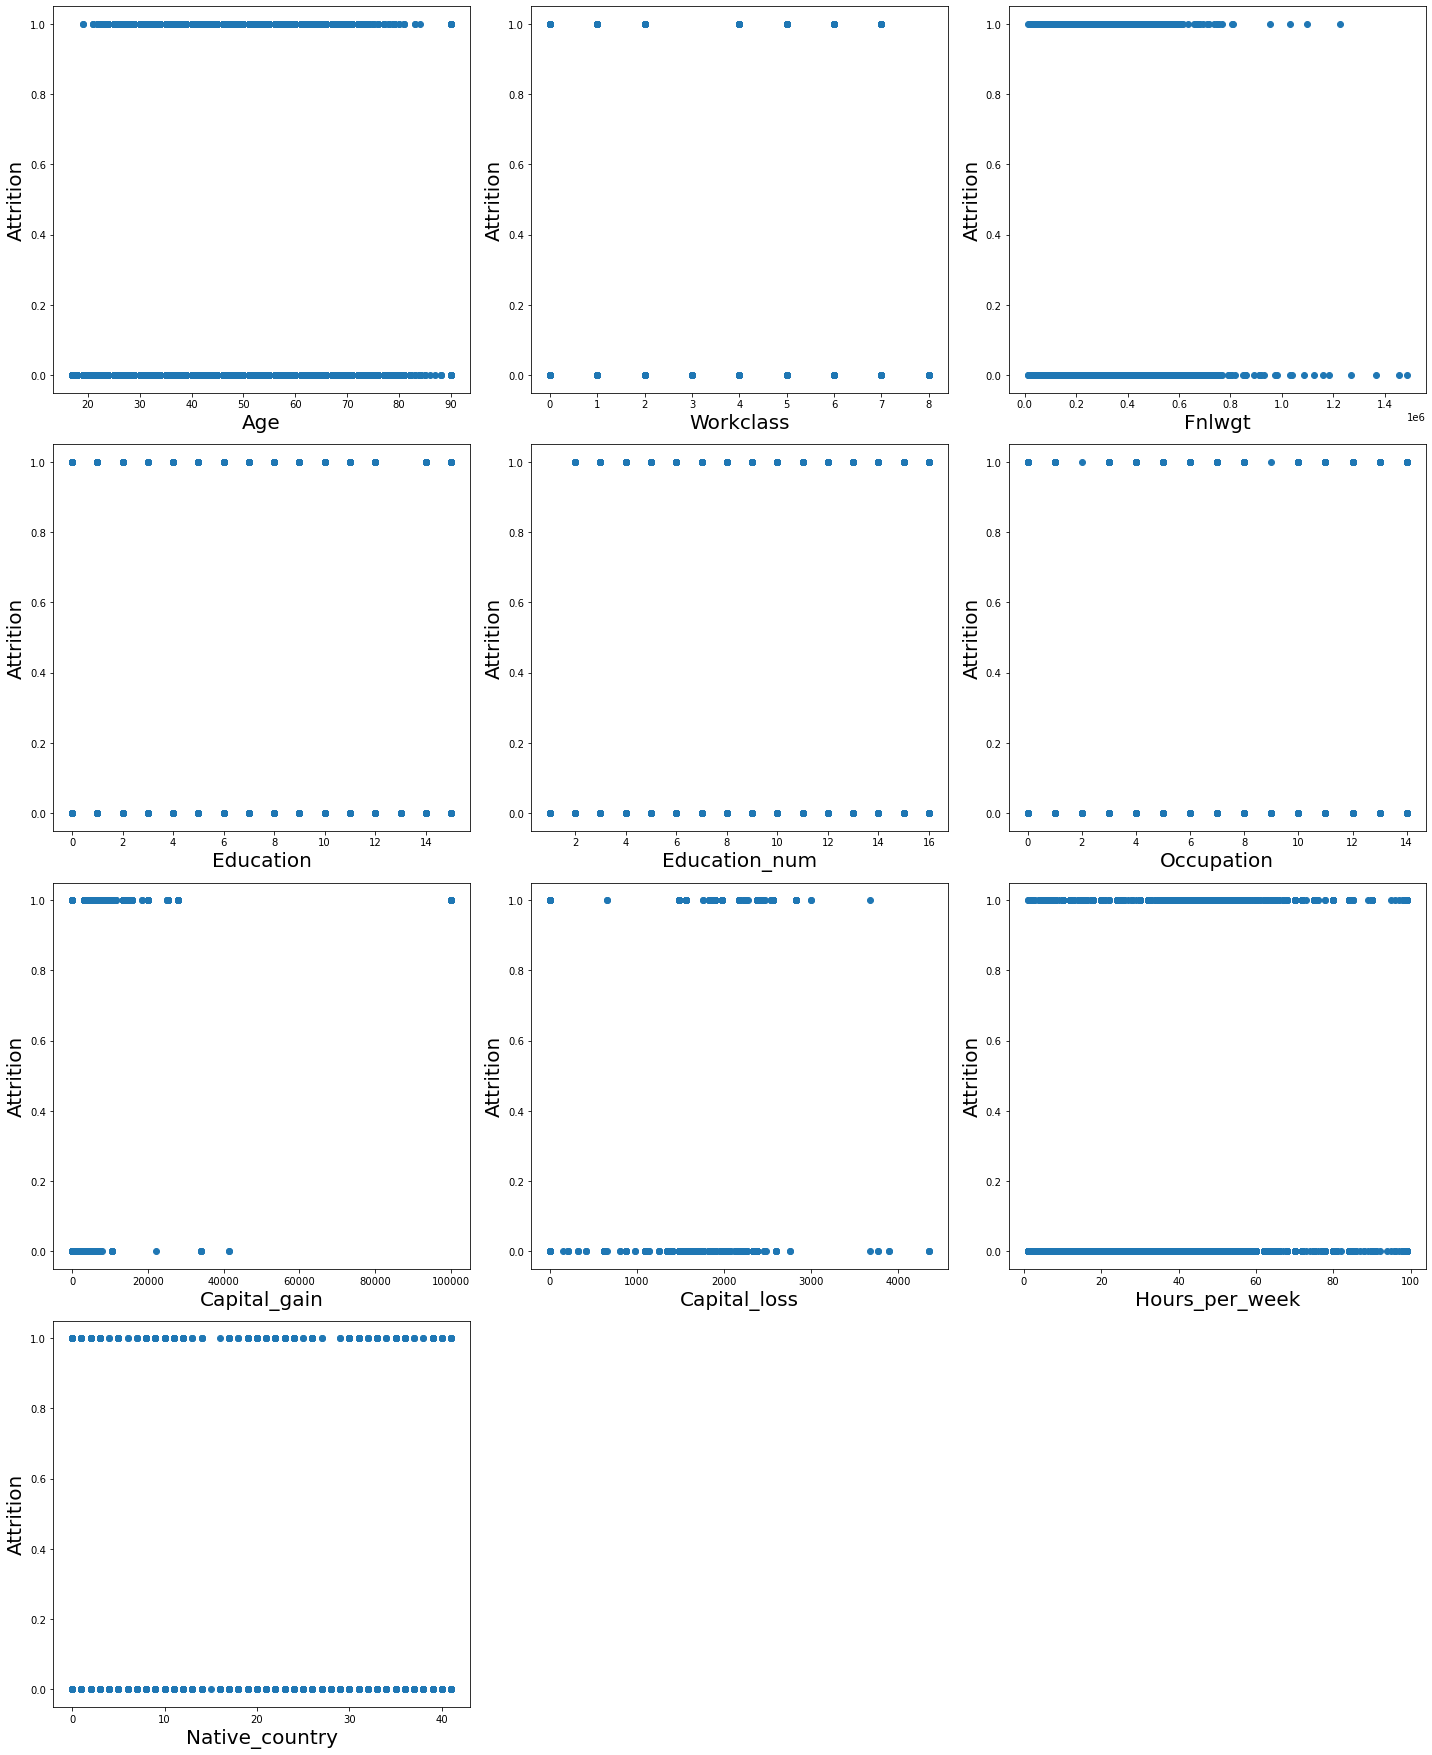

In [15]:
plt.figure(figsize=(20,30))
pltnumber=1

for column in X:
    if pltnumber<=15:
        ax=plt.subplot(5,3,pltnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    pltnumber+=1
plt.tight_layout()

0.5587118988154982
-0.7522454408295943
1.4469055818253151
-0.9340196537739126
-0.31161553498633193
0.11453431348441435
11.953139157554617
4.594337190555792
0.2276253044722967
-3.658066813887923
1.212327081863191


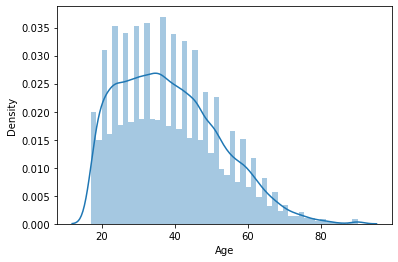

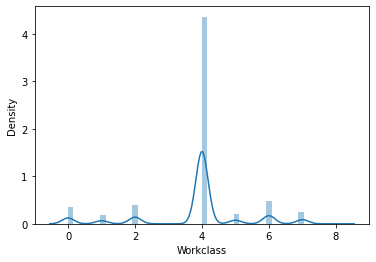

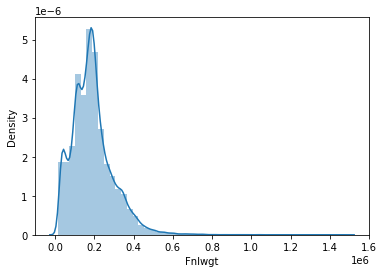

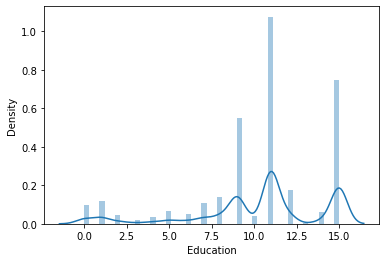

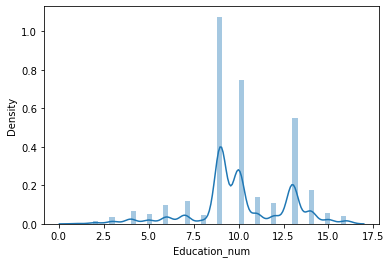

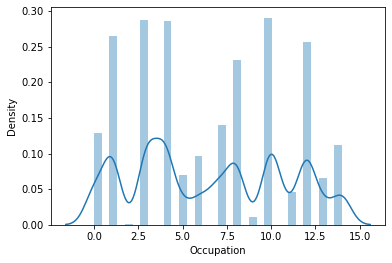

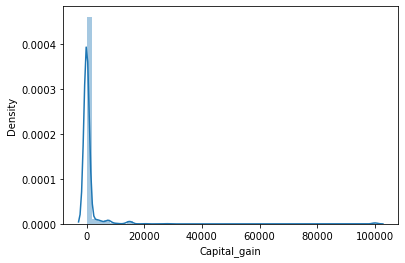

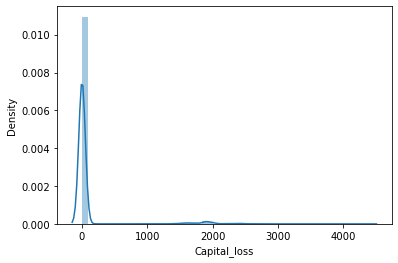

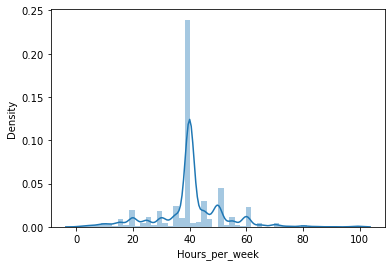

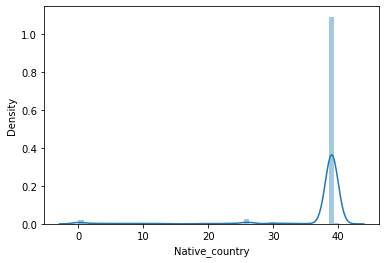

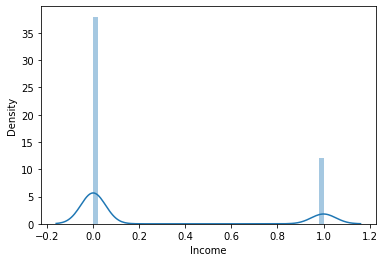

In [16]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [17]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Occupation         0.114540
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [18]:
df["Fnlwgt"]=np.cbrt(df["Fnlwgt"])
df["Capital_gain"]=np.cbrt(df["Capital_gain"])
df["Capital_loss"]=np.cbrt(df["Capital_loss"])

In [19]:
df["Capital_gain"]=np.sqrt(df["Capital_gain"])
df["Capital_loss"]=np.sqrt(df["Capital_loss"])
df.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt           -0.164177
Education        -0.934063
Education_num    -0.311630
Occupation        0.114540
Capital_gain      3.227650
Capital_loss      4.310426
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

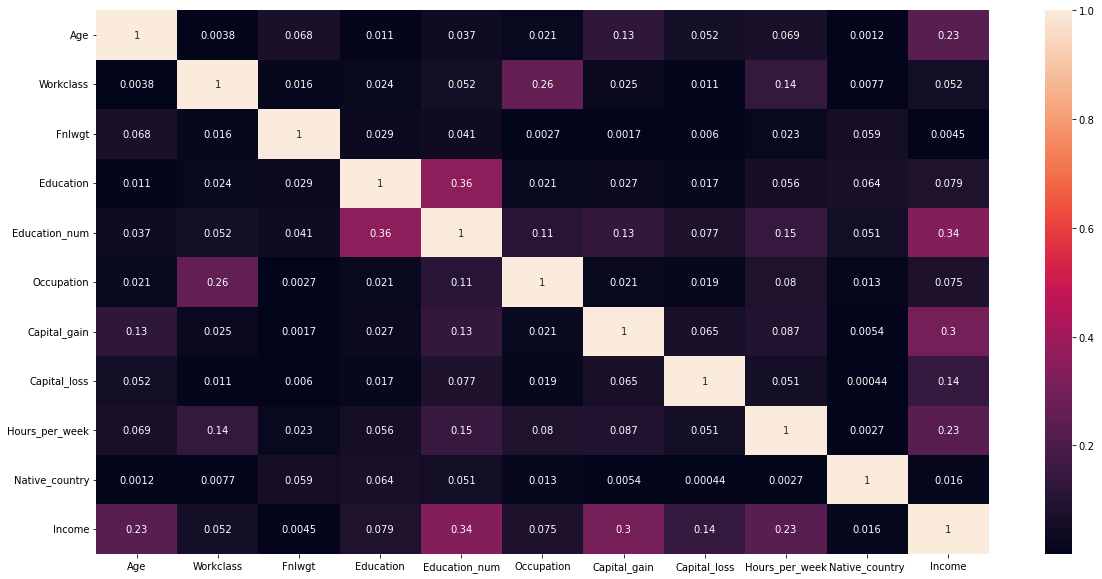

In [20]:
df_corr=df.corr().abs()
df_corr
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True)
plt.show()

In [21]:
X=df.drop(columns="Income")
Y=df["Income"]

In [22]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.029041,Age
1,1.086895,Workclass
2,1.010209,Fnlwgt
3,1.158119,Education
4,1.214623,Education_num
5,1.088041,Occupation
6,1.046263,Capital_gain
7,1.017648,Capital_loss
8,1.052302,Hours_per_week
9,1.008615,Native_country


# USING KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [24]:
X=df.drop(columns="Income")
Y=df["Income"]

In [25]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [27]:
Y_pred=knn.predict(X_test)


cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[5572,  609],
       [1002,  957]], dtype=int64)

In [28]:
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.8020884520884521

In [29]:
auc=roc_auc_score(Y_test,Y_pred)
auc

0.6949934009597658

In [30]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

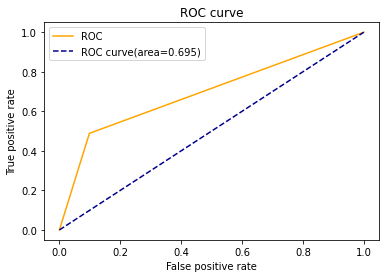

In [31]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      6181
           1       0.61      0.49      0.54      1959

    accuracy                           0.80      8140
   macro avg       0.73      0.69      0.71      8140
weighted avg       0.79      0.80      0.79      8140



# USING KNN WITH HYPERPARAMETER TUNING

In [33]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)
knn=KNeighborsClassifier()

In [35]:
param_grid=[
    {'algorithm':['kd_tree','brute'],
    'leaf_size':[15,18],
    'n_neighbors':[3,5,7]
    }
]

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1,verbose=2)
clf.fit(X_train,Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute'],
                          'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]}],
             verbose=2)

In [38]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [39]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)


accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.808968058968059

In [40]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[5648,  533],
       [1022,  937]], dtype=int64)

In [41]:
auc=roc_auc_score(Y_test,Y_pred)
auc

0.6960366282451476

In [42]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

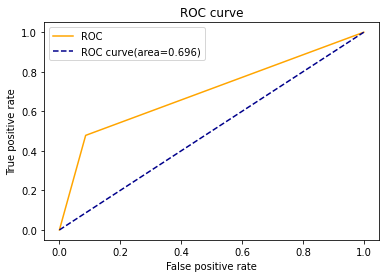

In [43]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6181
           1       0.64      0.48      0.55      1959

    accuracy                           0.81      8140
   macro avg       0.74      0.70      0.71      8140
weighted avg       0.80      0.81      0.80      8140



# MODELLING WITH RANDOM FOREST

In [45]:
X=df.drop(columns="Income")
Y=df["Income"]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
Y_pred=rf_classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[5790  391]
 [1061  898]]
0.8216216216216217
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6181
           1       0.70      0.46      0.55      1959

    accuracy                           0.82      8140
   macro avg       0.77      0.70      0.72      8140
weighted avg       0.81      0.82      0.81      8140



# RANDOM FOREST WITH HYPERPARAMETER (RANDOM AND GRID)

In [49]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [50]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [51]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [52]:
best_random_grid=rf_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=600)

In [53]:
from sklearn.metrics import accuracy_score
Y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[5971  210]
 [1105  854]]
Accuracy Score 0.8384520884520884
Classification report:               precision    recall  f1-score   support

           0       0.84      0.97      0.90      6181
           1       0.80      0.44      0.57      1959

    accuracy                           0.84      8140
   macro avg       0.82      0.70      0.73      8140
weighted avg       0.83      0.84      0.82      8140



# GRID SEARCH CV

In [54]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [10], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [400, 500, 600, 700, 800]}


In [56]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=2)

In [57]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=6,
                       n_estimators=600)

In [58]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=6,
                       n_estimators=600)

In [59]:
Y_pred=best_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[5964  217]
 [1101  858]]
Accuracy Score 0.8380835380835381
Classification report:               precision    recall  f1-score   support

           0       0.84      0.96      0.90      6181
           1       0.80      0.44      0.57      1959

    accuracy                           0.84      8140
   macro avg       0.82      0.70      0.73      8140
weighted avg       0.83      0.84      0.82      8140



In [60]:
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.8380835380835381

In [61]:
auc=roc_auc_score(Y_test,Y_pred)
auc

0.7014354863605383

In [62]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

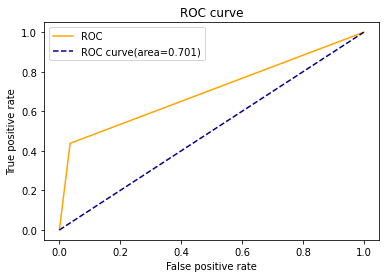

In [63]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# DECISION TREE

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
X=df.drop(columns="Income")
Y=df["Income"]

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)


dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [67]:
Y_pred=dt.predict(X_test)


accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.7718673218673219

In [68]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[5218,  963],
       [ 894, 1065]], dtype=int64)

In [69]:
auc=roc_auc_score(Y_test,Y_pred)
auc

0.6939223421674832

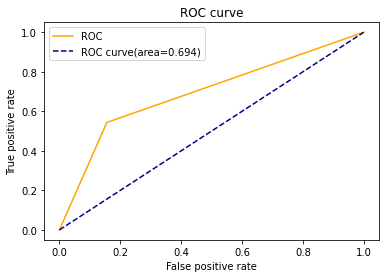

In [70]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)



plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [71]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      6181
           1       0.53      0.54      0.53      1959

    accuracy                           0.77      8140
   macro avg       0.69      0.69      0.69      8140
weighted avg       0.77      0.77      0.77      8140



# DECISIONTREE WITH HYPER PARAMETER

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [73]:
dt=DecisionTreeClassifier()

In [74]:
param_grid = {
               'max_depth': range(3,12,3),
               'min_samples_split': range(4,10,3),
               'min_samples_leaf': range(3,10,3),
              'criterion':['entropy','gini']}

In [75]:
clf=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1,verbose=2)
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 12, 3),
                         'min_samples_leaf': range(3, 10, 3),
                         'min_samples_split': range(4, 10, 3)},
             verbose=2)

In [76]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [77]:
Y_pred=clf.predict(X_test)


cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[5814,  367],
       [1004,  955]], dtype=int64)

In [78]:
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.8315724815724815

In [79]:
auc=roc_auc_score(Y_test,Y_pred)
auc

0.7140590568059225

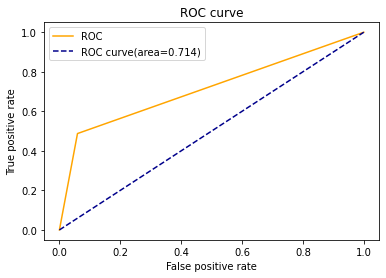

In [80]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)


plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [81]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6181
           1       0.72      0.49      0.58      1959

    accuracy                           0.83      8140
   macro avg       0.79      0.71      0.74      8140
weighted avg       0.82      0.83      0.82      8140



# GRADIENT BOOSTING

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
X=df.drop(columns="Income")
Y=df["Income"]

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)


gbdt=GradientBoostingClassifier()
gbdt.fit(X_train,Y_train)

GradientBoostingClassifier()

In [85]:
Y_pred=gbdt.predict(X_test)


accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.8425061425061425

In [86]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[5925,  256],
       [1026,  933]], dtype=int64)

In [87]:
auc=roc_auc_score(Y_test,Y_pred)
auc

0.7174230766467312

In [88]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

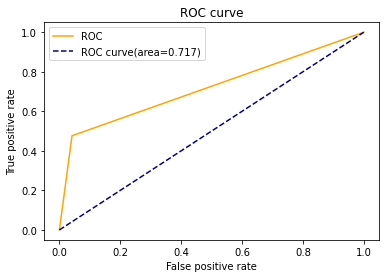

In [89]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [90]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6181
           1       0.78      0.48      0.59      1959

    accuracy                           0.84      8140
   macro avg       0.82      0.72      0.75      8140
weighted avg       0.84      0.84      0.83      8140



# GBDT WITH HYPER PARAMETER

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [92]:
gbdt=GradientBoostingClassifier()

In [93]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'learning_rate':np.arange(0.1,1,0.1)}

In [94]:
clf=GridSearchCV(gbdt,param_grid,cv=5,n_jobs=-1,verbose=2)
clf.fit(X_train,Y_train)  

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)},
             verbose=2)

In [95]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 4}

In [96]:
Y_pred=clf.predict(X_test)

In [97]:
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.8474201474201474

In [98]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[5910,  271],
       [ 971,  988]], dtype=int64)

In [99]:
auc=roc_auc_score(Y_test,Y_pred)
auc

0.7302474551307796

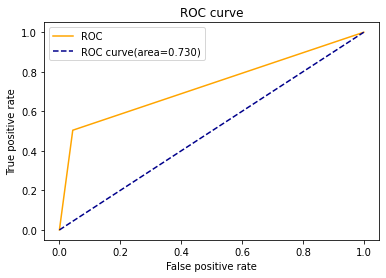

In [100]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)


plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [101]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      6181
           1       0.78      0.50      0.61      1959

    accuracy                           0.85      8140
   macro avg       0.82      0.73      0.76      8140
weighted avg       0.84      0.85      0.83      8140



# Conclusion:

Conducted 4 models on Census Income Project Project dataset namely KNN, Random Forest, Desicion Tree and Gradient Boosting with Hyperparameter tuning It comes to a conclusion that Gradient Boosting Model is providing best score for Census Income Project dataset Accuracy=0.8474201474201474

In [104]:
md=[knn,rf,dt,gbdt]
import pickle
filename="Census.pkl"
pickle.dump(md,open(filename,"wb"))